# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset  
   Dataset dapat diperoleh public repositories(kaggle). dataset disimpan di github untuk peng-importan yang lebih mudah (https://raw.githubusercontent.com/Amerta1090/Membangun-Sistem-Machine-Learning_HousePricing/refs/heads/main/Housing.csv)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Amerta1090/Membangun-Sistem-Machine-Learning_HousePricing/refs/heads/main/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.shape

(545, 13)

In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
print(df['mainroad'].unique())
print(df['guestroom'].unique())
print(df['basement'].unique())
print(df['hotwaterheating'].unique())
print(df['airconditioning'].unique())
print(df['prefarea'].unique())
print(df['furnishingstatus'].unique())

['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['furnished' 'semi-furnished' 'unfurnished']


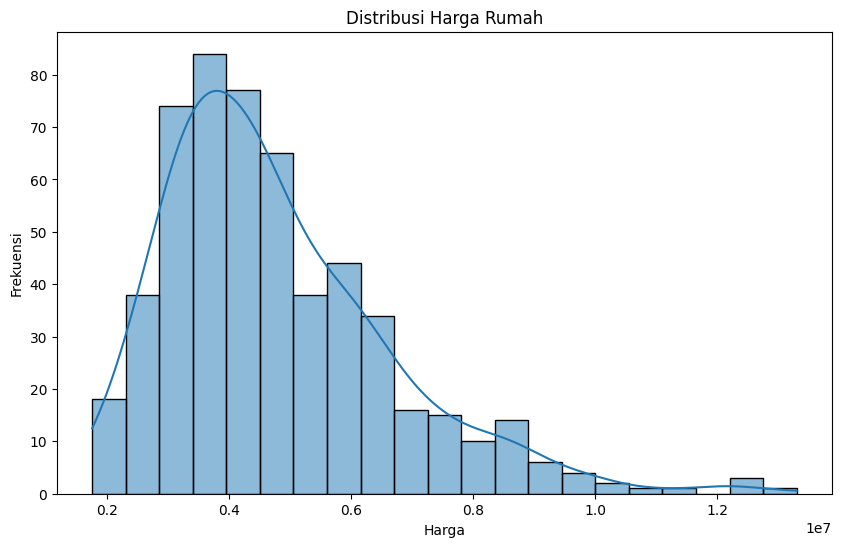

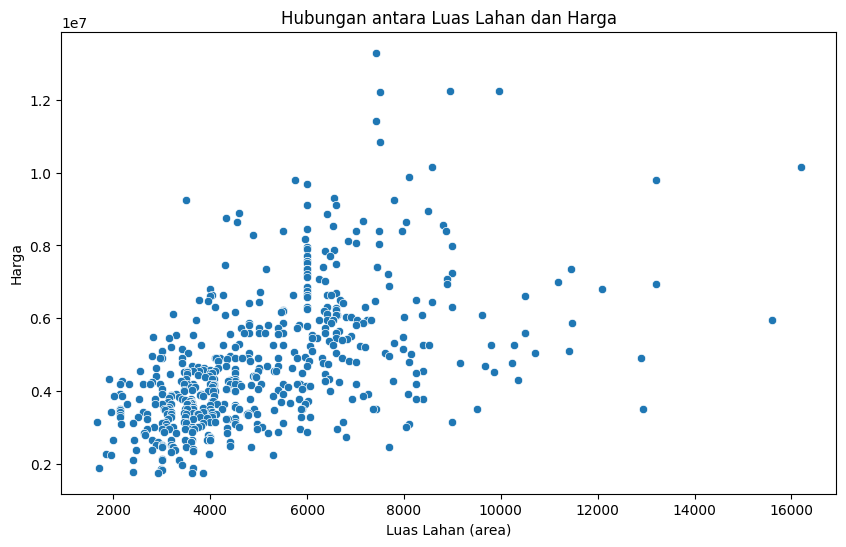

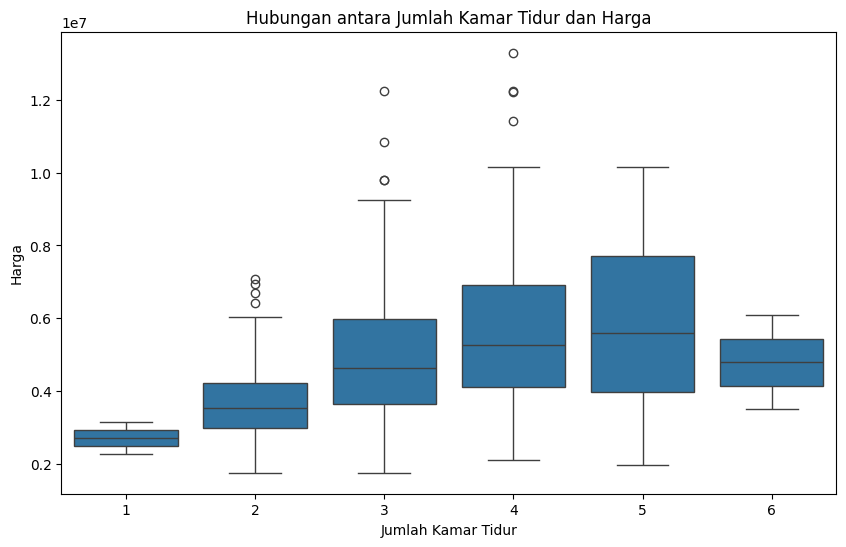

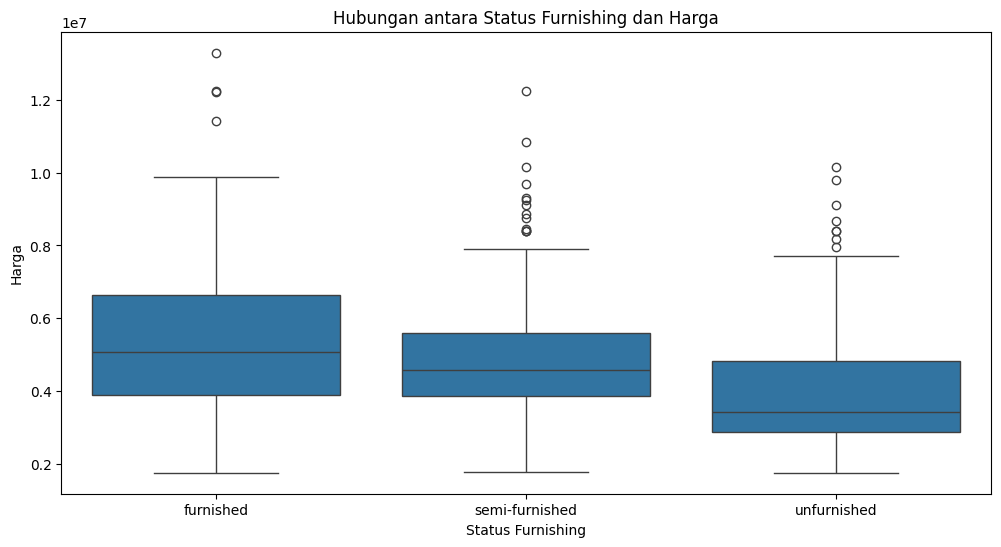

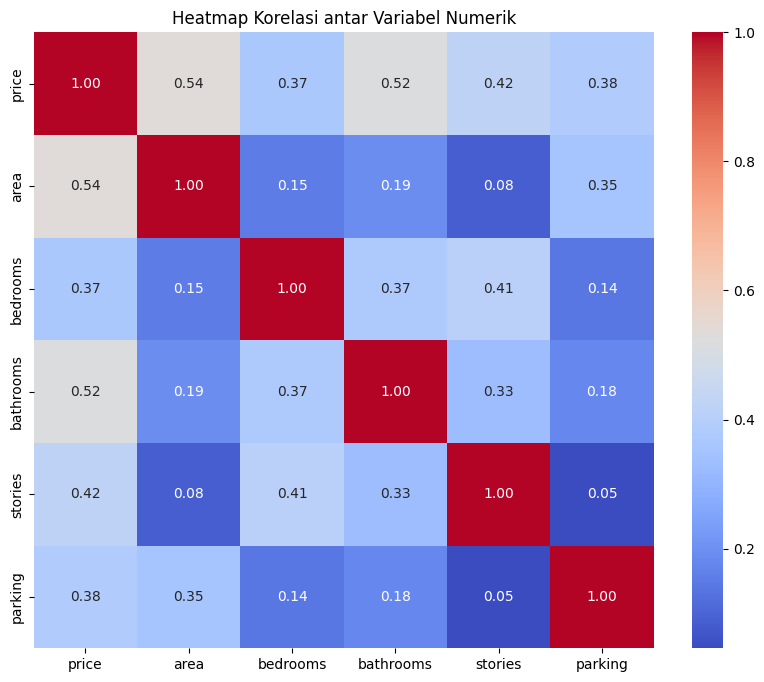

In [7]:
# Visualisasi distribusi harga
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi hubungan antara luas lahan dan harga
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Hubungan antara Luas Lahan dan Harga')
plt.xlabel('Luas Lahan (area)')
plt.ylabel('Harga')
plt.show()

# Visualisasi jumlah kamar tidur dan harga
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Hubungan antara Jumlah Kamar Tidur dan Harga')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Harga')
plt.show()

# Visualisasi pengaruh furnishinstatus terhadap harga
plt.figure(figsize=(12, 6))
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.title('Hubungan antara Status Furnishing dan Harga')
plt.xlabel('Status Furnishing')
plt.ylabel('Harga')
plt.show()

# Korelasi antar variabel numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Variabel Numerik')
plt.show()

In [8]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [9]:
print(df.duplicated().sum())

0


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
# Identifikasi fitur numerik yang akan distandardisasi
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan standarisasi pada fitur numerik
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Tampilkan beberapa baris pertama setelah standarisasi untuk verifikasi
print("Data setelah standarisasi:")
print(df.head())

# Tampilkan statistik deskriptif fitur numerik setelah standarisasi
print("\nStatistik deskriptif fitur numerik setelah standarisasi:")
print(df[numeric_features].describe())

Data setelah standarisasi:
      price      area  bedrooms  bathrooms   stories mainroad guestroom  \
0  4.566365  1.046726  1.403419   1.421812  1.378217      yes        no   
1  4.004484  1.757010  1.403419   5.405809  2.532024      yes        no   
2  4.004484  2.218232  0.047278   1.421812  0.224410      yes        no   
3  3.985755  1.083624  1.403419   1.421812  0.224410      yes        no   
4  3.554979  1.046726  1.403419  -0.570187  0.224410      yes       yes   

  basement hotwaterheating airconditioning   parking prefarea furnishingstatus  
0       no              no             yes  1.517692      yes        furnished  
1       no              no             yes  2.679409       no        furnished  
2      yes              no              no  1.517692      yes   semi-furnished  
3      yes              no             yes  2.679409      yes        furnished  
4      yes              no             yes  1.517692       no        furnished  

Statistik deskriptif fitur numerik 

Outlier di fitur 'area':
        price      area  bedrooms  bathrooms   stories mainroad guestroom  \
7    2.880722  5.096263  2.759560   3.413810  0.224410      yes        no   
10   2.693428  3.712595  0.047278  -0.570187  0.224410      yes        no   
56   1.378626  2.900842  1.403419  -0.570187  0.224410      yes        no   
64   1.195079  2.778618  0.047278  -0.570187 -0.929397      yes        no   
66   1.157620  3.712595 -1.308863  -0.570187 -0.929397      yes        no   
69   1.082702  3.200637  1.403419   1.421812  0.224410      yes        no   
82   0.989056  2.467293  0.047278   1.421812 -0.929397      yes        no   
125  0.629452  4.819529  0.047278  -0.570187 -0.929397      yes        no   
129  0.591993  2.910067  0.047278  -0.570187  1.378217      yes        no   
142  0.445904  2.467293  1.403419   1.421812  0.224410      yes        no   
146  0.445904  2.467293 -1.308863  -0.570187 -0.929397      yes        no   
186  0.183693  2.887006 -1.308863  -0.570187  0.224

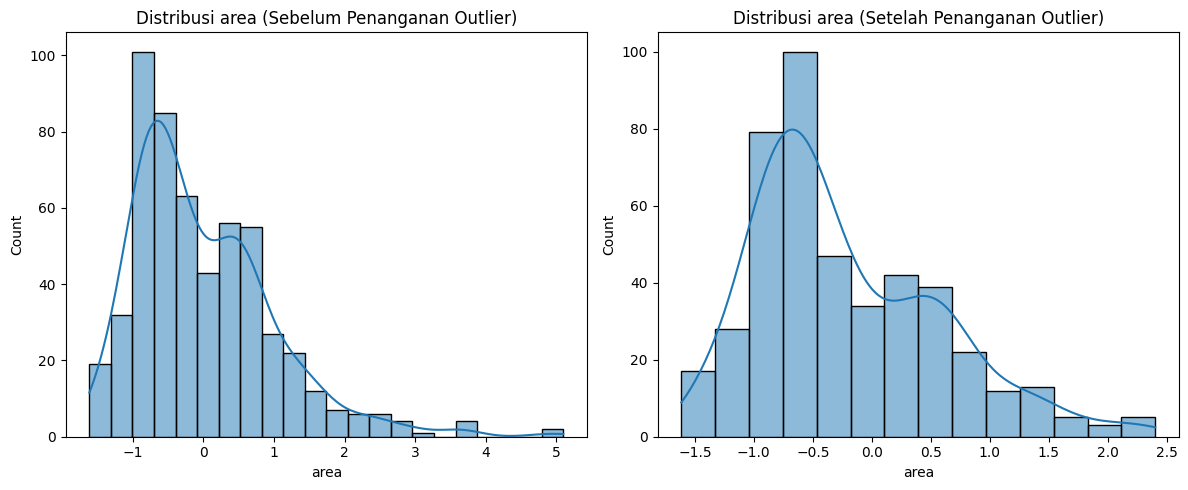

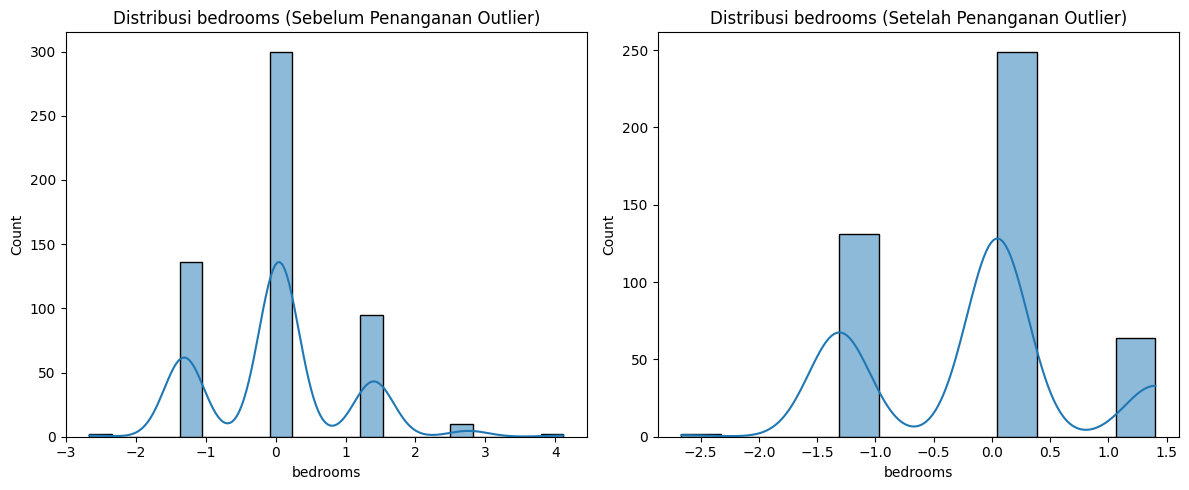

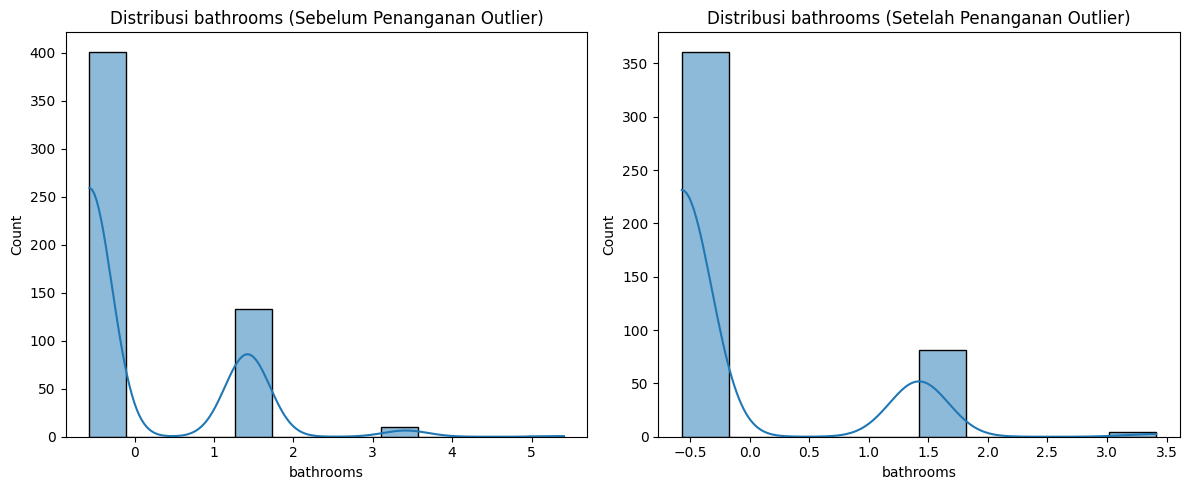

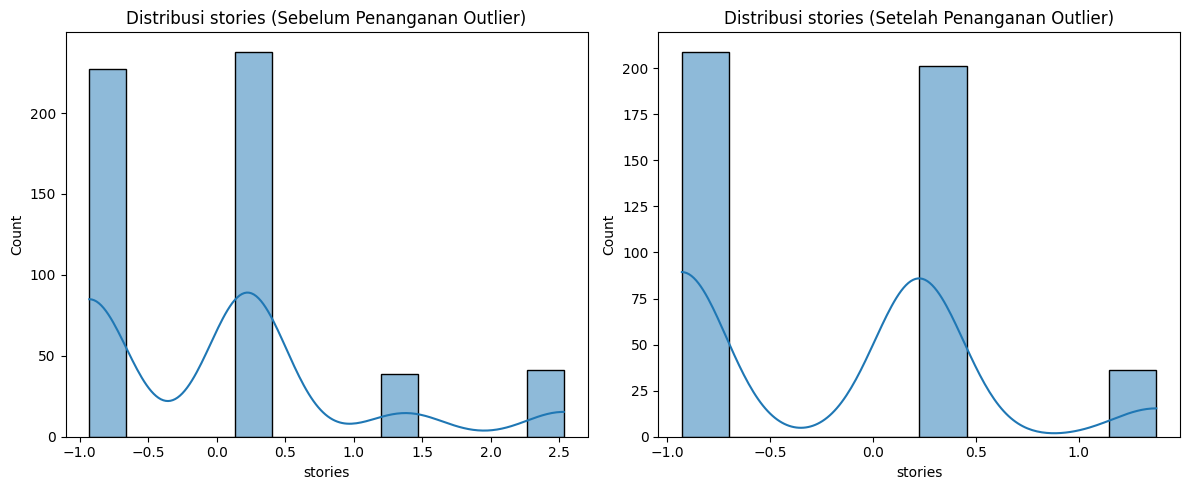

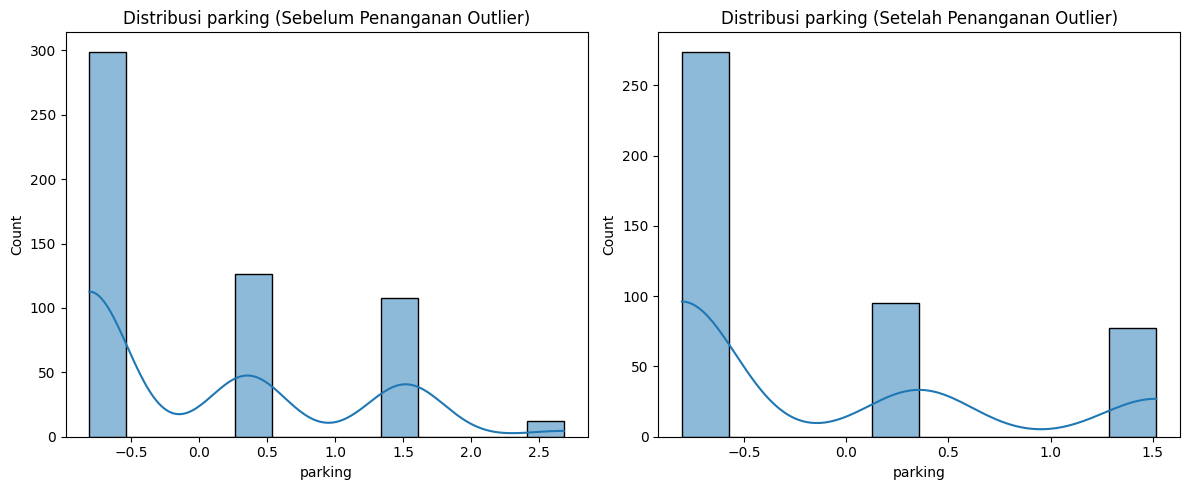

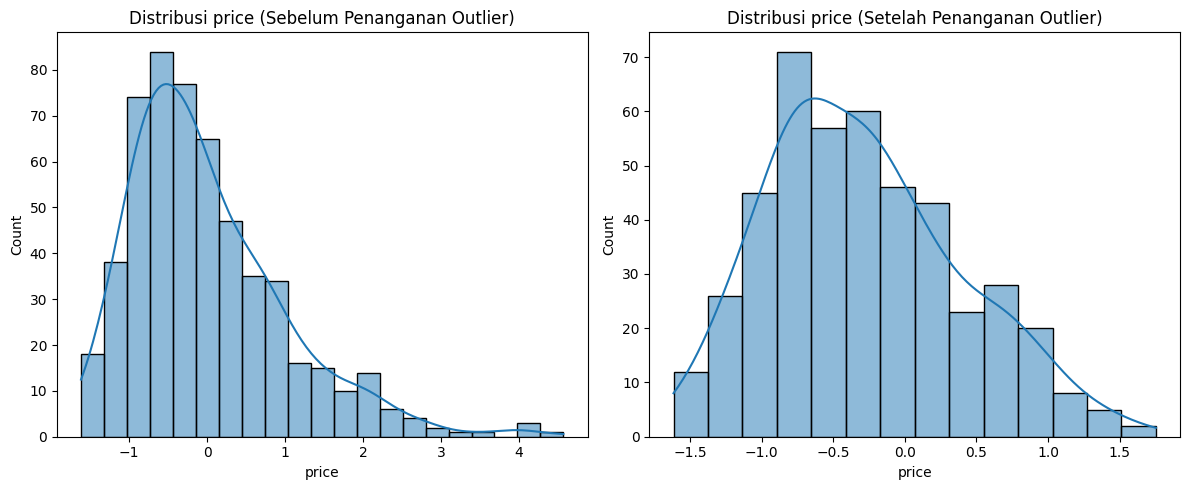

In [11]:
# Deteksi dan Penanganan Outlier menggunakan IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Identifikasi fitur numerik untuk deteksi outlier
numeric_features_for_outlier = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

# Simpan data sebelum penanganan outlier untuk perbandingan
df_before_outliers = df.copy()

# Iterasi melalui setiap fitur numerik dan deteksi outlier
for feature in numeric_features_for_outlier:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, feature)
    print(f"Outlier di fitur '{feature}':")
    print(outliers)
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}\n")

    # Penanganan Outlier (misalnya, dengan menghapus baris yang mengandung outlier)
    # Anda bisa memilih metode lain seperti capping atau transformasi
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    print(f"Jumlah baris setelah menghapus outlier di '{feature}': {len(df)}")

# Tampilkan shape dataset setelah penanganan outlier
print("\nShape dataset setelah penanganan outlier:")
print(df.shape)

# Visualisasi distribusi fitur numerik sebelum dan sesudah penanganan outlier
for feature in numeric_features_for_outlier:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df_before_outliers[feature], kde=True)
    plt.title(f'Distribusi {feature} (Sebelum Penanganan Outlier)')

    plt.subplot(1, 2, 2)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribusi {feature} (Setelah Penanganan Outlier)')

    plt.tight_layout()
    plt.show()

In [12]:
# Identifikasi fitur kategorikal yang akan di-encode
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Terapkan Label Encoding pada setiap fitur kategorikal
for feature in categorical_features:
  if feature in df.columns: # Pastikan fitur ada di DataFrame setelah penanganan outlier
    df[feature] = label_encoder.fit_transform(df[feature])
    print(f"Label Encoding diterapkan pada '{feature}'. Unique values setelah encoding: {df[feature].unique()}")
  else:
    print(f"Fitur '{feature}' tidak ditemukan di DataFrame setelah penanganan outlier.")

# Tampilkan beberapa baris pertama setelah encoding untuk verifikasi
print("\nData setelah Label Encoding:")
print(df.head())

# Tampilkan info dataset setelah encoding untuk melihat tipe data
print("\nInfo dataset setelah Label Encoding:")
df.info()

Label Encoding diterapkan pada 'mainroad'. Unique values setelah encoding: [1 0]
Label Encoding diterapkan pada 'guestroom'. Unique values setelah encoding: [0 1]
Label Encoding diterapkan pada 'basement'. Unique values setelah encoding: [0 1]
Label Encoding diterapkan pada 'hotwaterheating'. Unique values setelah encoding: [1 0]
Label Encoding diterapkan pada 'airconditioning'. Unique values setelah encoding: [0 1]
Label Encoding diterapkan pada 'prefarea'. Unique values setelah encoding: [1 0]
Label Encoding diterapkan pada 'furnishingstatus'. Unique values setelah encoding: [0 1 2]

Data setelah Label Encoding:
       price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
36  1.753214  1.075322  0.047278   1.421812  1.378217         1          0   
40  1.663313  0.645462  0.047278  -0.570187  0.224410         1          0   
45  1.494749  0.391790  0.047278   1.421812  1.378217         1          0   
48  1.438560 -0.392289  0.047278   1.421812  0.224410         1   

In [13]:
# Simpan DataFrame yang sudah diproses ke file CSV
df.to_csv('processed_housing_data.csv', index=False)

print("Dataset yang sudah diproses berhasil diekspor ke 'processed_housing_data.csv'")

Dataset yang sudah diproses berhasil diekspor ke 'processed_housing_data.csv'
